<a href="https://colab.research.google.com/github/navy1999/DL/blob/master/NNDL_CLASS_PROJECT_129_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUBMITTED BY NAVNEET SHANKAR 17EC129 AND NAGARAJ SG 17EC128

In [1]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw, ImageOps
import string
import numpy as np
import cv2

In [2]:
!wget "http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar"

--2020-12-06 14:05:55--  http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar [following]
--2020-12-06 14:05:55--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G   707KB/s    in 42m 34s 

2020-12-06 14:48:30 (764 KB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [3]:
!tar -xvf VOCtrainval_11-May-2012.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC

In [4]:
#set the seed
np.random.seed(seed=123)

### Function to generate watermarks on images:

In [5]:
!unzip "arial.zip"

Archive:  arial.zip
  inflating: arial.ttf               


In [10]:
prints = list(string.printable)[0:84]

def gen_watermark(im_str, train = 1):
    img = Image.open("/content/VOCdevkit/VOC2012/JPEGImages/{}".format(im_str))
    img.save('/content/RAWS/raw_imgs/{}'.format(im_str))
    font_size = np.random.randint(low = 20, high = 100)

    font = ImageFont.truetype('arial.ttf', font_size) 
   
    img_temp = Image.new('L', (350,350))

    text_str = np.random.choice(prints, np.random.randint(low=5, high = 10))
    text_str = "".join(text_str)

    draw_temp = ImageDraw.Draw(img_temp) 
   
    opac = np.random.randint(low=90, high=120)

    draw_temp.text((0, 0), text_str,  font=font, fill=opac)
   
    rot_int = np.random.randint(low = 0, high = 20)

    rotated_text = img_temp.rotate(rot_int,  expand=1)

    col_1 = (255,255,255)
    col_2 = (255,255,255)

    rand_loc = tuple(np.random.randint(low=10,high=100, size = (2,)))

    img.paste(ImageOps.colorize(rotated_text, col_1, col_2), rand_loc,  rotated_text)

    img.save('/content/WATS/wat_imgs/{}'.format(im_str))

### Creating the directories to hold the original and watermarked images:

In [11]:
rpath = "/content/RAWS"
wpath = "/content/WATS"

if not os.path.exists(rpath):
    os.mkdir(rpath)
    os.mkdir("/content/RAWS/raw_imgs")
else:
    shutil.rmtree(rpath)  
    
if not os.path.exists(wpath):
    os.mkdir(wpath)
    os.mkdir("/content/WATS/wat_imgs")
else:
    shutil.rmtree(wpath)

In [12]:
!pip install pillow

### Generating images with and without watermarks:

In [13]:
im_list = os.listdir("/content/VOCdevkit/VOC2012/JPEGImages")

for ind, img in enumerate(im_list):

    wat_img = gen_watermark(img)

### Examples:

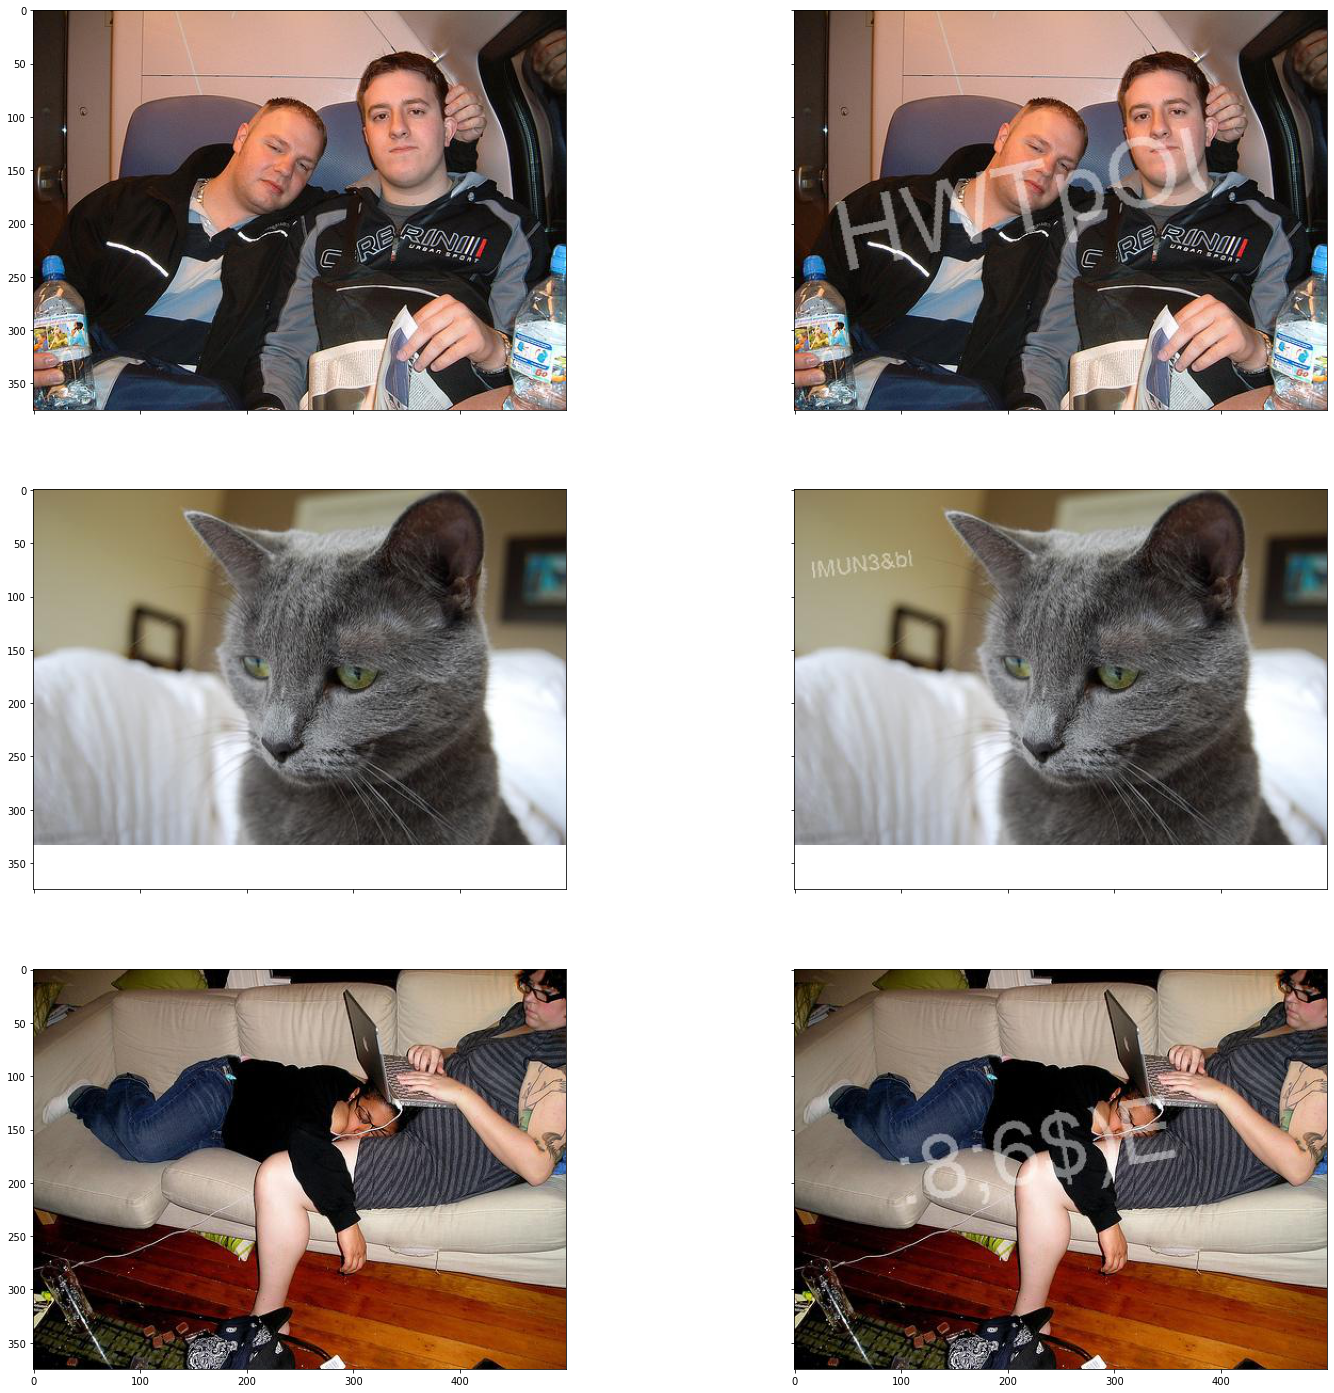

In [14]:
dir_raw = os.listdir("/content/RAWS/raw_imgs")
dir_wats = os.listdir("/content/WATS/wat_imgs")

raw_str = "/content/RAWS/raw_imgs/"
wat_str = "/content/WATS/wat_imgs/"

f, axs = plt.subplots(3,2, figsize=(25, 25), sharey=True, sharex = True)
axs = axs.ravel()

img_raw = Image.open(raw_str + dir_raw[4])
img_wat = Image.open(wat_str + dir_wats[4])
axs[0].imshow(img_raw)
axs[1].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[5])
img_wat = Image.open(wat_str + dir_wats[5])
axs[2].imshow(img_raw)
axs[3].imshow(img_wat)

img_raw = Image.open(raw_str + dir_raw[10])
img_wat = Image.open(wat_str + dir_wats[10])
axs[4].imshow(img_raw)
axs[5].imshow(img_wat)

plt.show()

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
raw_dir = '/content/RAWS/'
wat_dir = '/content/WATS/'
raw_datagen = ImageDataGenerator(rescale=1./255)
raw_generator = raw_datagen.flow_from_directory(
        raw_dir, 
        target_size=(128, 128),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")

wat_datagen = ImageDataGenerator(rescale=1./255)
wat_generator = wat_datagen.flow_from_directory(
        wat_dir,  
        target_size=(128, 128),
        batch_size=5096, shuffle = 0,
        class_mode="categorical")
x_raw,y = raw_generator.next()
x_wat,y = wat_generator.next()

Found 17125 images belonging to 1 classes.
Found 17125 images belonging to 1 classes.


In [17]:
print(x_raw.shape)
print(x_wat.shape)

(5096, 128, 128, 3)
(5096, 128, 128, 3)


In [18]:
x_train_raw = x_raw[0:4500]
x_train_wat = x_wat[0:4500]

x_val_raw = x_raw[4500:4900]
x_val_wat = x_wat[4500:4900]

x_train = np.vstack((x_train_raw, x_train_wat))
x_val = np.vstack((x_val_raw, x_val_wat))

In [19]:
y_train = np.repeat([0.], 4500)
y_train = np.append(y_train, np.repeat([1.], 4500))

y_val = np.repeat([0.], 400)
y_val = np.append(y_val, np.repeat([1.], 400))

In [21]:
#Model Based On Alexnet
model = keras.models.Sequential()
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='elu'))
model.add(layers.Conv2D(100, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Conv2D(75, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(202, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(40, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 100)       115300    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 100)        

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 40, verbose = 1)

Epoch 1/30
225/225 [==============================] - 6s 26ms/step - loss: 0.7078 - acc: 0.5183 - val_loss: 0.6898 - val_acc: 0.5275
Epoch 2/30
225/225 [==============================] - 6s 26ms/step - loss: 0.6769 - acc: 0.5689 - val_loss: 0.6089 - val_acc: 0.6500
Epoch 3/30
225/225 [==============================] - 6s 26ms/step - loss: 0.5870 - acc: 0.6900 - val_loss: 0.5352 - val_acc: 0.6975
Epoch 4/30
225/225 [==============================] - 6s 26ms/step - loss: 0.5225 - acc: 0.7350 - val_loss: 0.4699 - val_acc: 0.7588
Epoch 5/30
225/225 [==============================] - 6s 26ms/step - loss: 0.4720 - acc: 0.7662 - val_loss: 0.4846 - val_acc: 0.7563
Epoch 6/30
225/225 [==============================] - 6s 26ms/step - loss: 0.4293 - acc: 0.7912 - val_loss: 0.4515 - val_acc: 0.7937
Epoch 7/30
225/225 [==============================] - 6s 26ms/step - loss: 0.3978 - acc: 0.8102 - val_loss: 0.3823 - val_acc: 0.8300
Epoch 8/30
225/225 [==============================] - 6s 26ms/step - 

In [23]:
df = pd.DataFrame(history.history)
df.to_csv('history.csv')

In [24]:
pd.read_csv('history.csv')

,Unnamed: 0,loss,acc,val_loss,val_acc
0,0,0.707759,0.518333,0.689843,0.52750
1,1,0.676851,0.568889,0.608944,0.65000
2,2,0.587040,0.690000,0.535189,0.69750
3,3,0.522529,0.735000,0.469860,0.75875
4,4,0.472050,0.766222,0.484601,0.75625
5,5,0.429334,0.791222,0.451489,0.79375
6,6,0.397845,0.810222,0.382287,0.83000
7,7,0.364604,0.833556,0.355826,0.83875
8,8,0.342207,0.841778,0.355377,0.84500
9,9,0.321536,0.856222,0.365348,0.83000


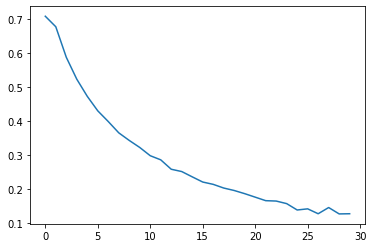

In [25]:
plt.plot(history.history['loss'])

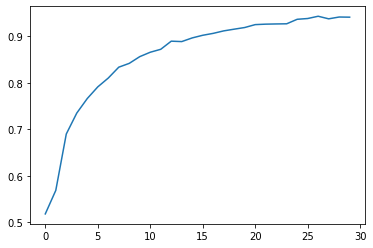

In [26]:
plt.plot(history.history['acc'])

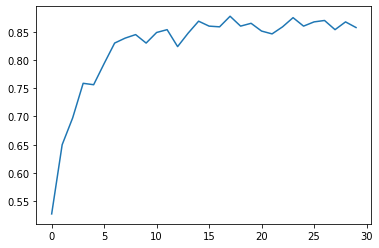

In [27]:
plt.plot(history.history['val_acc'])

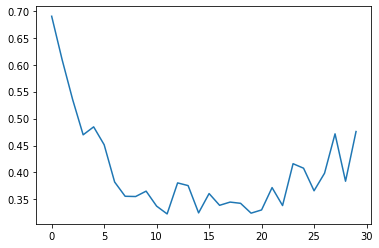

In [28]:
plt.plot(history.history['val_loss'])

In [29]:
res_raw=model.predict(x_val_raw[0:10], verbose=1)

1/1 [==============================] - 0s 9ms/step


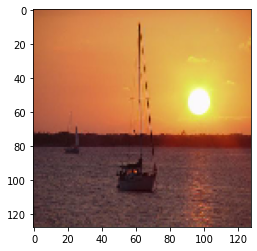

In [30]:
plt.imshow(x_val_raw[3])

In [31]:
res_raw[3]

array([0.00057874], dtype=float32)

In [32]:
res_wat=model.predict(x_val_wat[0:10],verbose=1)

1/1 [==============================] - 0s 3ms/step


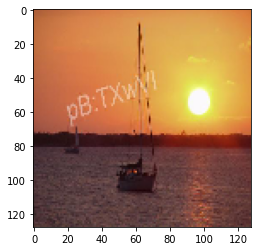

In [33]:
plt.imshow(x_val_wat[3])

In [34]:
res_wat[3]

array([1.], dtype=float32)